# Experiments on synthetic data

In [1]:
%load_ext autoreload
%autoreload 2

Required imports

In [2]:
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from utils.train_synthetic import run_synthetic_experiments
from utils.results import get_joint_coverages, get_interval_widths, plot_timeseries

In [3]:
BASELINES = ['CFRNN']

# Static noise profile

In [38]:
for baseline in ['CFRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='static', 
                                  baseline=baseline,
                                  n_train = 2000,
                                  retrain_auxiliary=True,
                                  recompute_dataset=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 81.24044494628906
Epoch: 50	Train loss: 9.250524425506592
Epoch: 100	Train loss: 9.006788682937621
Epoch: 150	Train loss: 8.388805389404297
Epoch: 200	Train loss: 7.657482576370239
Epoch: 250	Train loss: 7.34607081413269
Epoch: 300	Train loss: 7.26207537651062
Epoch: 350	Train loss: 6.29205093383789
Epoch: 400	Train loss: 5.312899732589722
Epoch: 450	Train loss: 5.130415296554565
Epoch: 500	Train loss: 4.849606561660766
Epoch: 550	Train loss: 5.5908119678497314
Epoch: 600	Train loss: 4.363440227508545
Epoch: 650	Train loss: 4.283811330795288
Epoch: 700	Train loss: 6.369759798049927
Epoch: 750	Train loss: 4.4529987335205075
Epoch: 800	Train loss: 4.771352291107178
Epoch: 850	Train loss: 4.807813453674316
Epoch: 900	Train loss: 4.194506573677063
Epoch: 950	Train loss: 7.1635761737823485
Training dataset 1
Epoch: 0	Train loss: 83.23585433959961
Epoch: 50	Train loss: 8.845319700241088
Epoch: 100	Train loss: 8.229940462112427
Epoch: 150

**Joint coverage** 

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [40]:
for baseline in ['CFRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'static', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
92.8 \(\pm\) 0.8\%
94.0 \(\pm\) 0.4\%
94.6 \(\pm\) 1.6\%
94.3 \(\pm\) 1.4\%
94.3 \(\pm\) 1.4\%

AdaptiveCFRNN
93.6 \(\pm\) 0.4\%
94.7 \(\pm\) 1.0\%
93.6 \(\pm\) 0.3\%
94.2 \(\pm\) 1.3\%
93.7 \(\pm\) 1.1\%

QRNN
65.0 \(\pm\) 2.7\%
65.6 \(\pm\) 3.4\%
66.4 \(\pm\) 1.9\%
65.2 \(\pm\) 4.4\%
67.2 \(\pm\) 1.6\%

DPRNN
5.4 \(\pm\) 0.5\%
5.6 \(\pm\) 1.0\%
5.0 \(\pm\) 0.9\%
4.7 \(\pm\) 1.0\%
4.2 \(\pm\) 1.0\%



In [110]:
for baseline in ['CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'static', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)

    print()

CFRNN
[16.44722347 16.96501667 17.11944893 17.34209549 16.96876431]
[3.69449142 3.34230051 3.50004207 3.76909034 3.27203236]

AdaptiveCFRNN
[21.05475494 21.90251205 20.8085498  23.28737286 21.55519516]
[4.96181789 5.67663224 4.44719657 5.12214817 5.67844598]

DPRNN
[2.82013162 2.94538281 2.77061952 2.87406446 2.8536792 ]
[0.33138791 0.3700536  0.36804268 0.35106769 0.38050776]

QRNN
[9.47492119 9.63299967 9.72052855 9.71000792 9.8446781 ]
[1.99090573 1.84661966 1.91620127 1.80339317 1.98716116]



# Time-dependent noise profile

Training procedure for CF-RNN/MQ-RNN/DP-RNN baselines (for 5 different seeds):

In [43]:
for baseline in ['CFRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='time_dependent', 
                                  baseline=baseline,
                                  n_train = 2000,
                                  retrain_auxiliary=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 84.4234619140625
Epoch: 50	Train loss: 12.888644886016845
Epoch: 100	Train loss: 12.360594844818115
Epoch: 150	Train loss: 11.653214836120606
Epoch: 200	Train loss: 10.932942295074463
Epoch: 250	Train loss: 10.140926742553711
Epoch: 300	Train loss: 9.618991374969482
Epoch: 350	Train loss: 9.163879299163819
Epoch: 400	Train loss: 9.026247692108154
Epoch: 450	Train loss: 9.197303104400635
Epoch: 500	Train loss: 8.01125636100769
Epoch: 550	Train loss: 7.914232587814331
Epoch: 600	Train loss: 11.86298589706421
Epoch: 650	Train loss: 8.87921862602234
Epoch: 700	Train loss: 8.349535036087037
Epoch: 750	Train loss: 8.381713342666625
Epoch: 800	Train loss: 8.599508285522461
Epoch: 850	Train loss: 7.528670167922973
Epoch: 900	Train loss: 7.006804084777832
Epoch: 950	Train loss: 8.182713890075684
Training dataset 1
Epoch: 0	Train loss: 95.2811279296875
Epoch: 50	Train loss: 22.429939651489256
Epoch: 100	Train loss: 21.807165718078615
Epoch: 

**Joint coverage**

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [105]:
for baseline in ['CFRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'time_dependent', seeds=[0,1,2,3])
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
92.7 \(\pm\) 1.5\%
92.6 \(\pm\) 0.9\%
91.1 \(\pm\) 1.4\%
90.6 \(\pm\) 1.4\%
91.3 \(\pm\) 0.7\%

AdaptiveCFRNN
93.2 \(\pm\) 1.4\%
92.5 \(\pm\) 1.4\%
91.3 \(\pm\) 1.1\%
91.4 \(\pm\) 1.0\%
67.5 \(\pm\) 39.0\%

QRNN
63.0 \(\pm\) 1.5\%
60.8 \(\pm\) 2.1\%
57.3 \(\pm\) 2.3\%
57.4 \(\pm\) 4.1\%
58.2 \(\pm\) 2.3\%

DPRNN
2.8 \(\pm\) 0.9\%
0.4 \(\pm\) 0.3\%
0.3 \(\pm\) 0.2\%
0.1 \(\pm\) 0.1\%
0.1 \(\pm\) 0.1\%



**Interval widths**

Prints the baseline; mean±std of interval width across horizons; rows denote the noise configuration and columns the random seed. 

In [109]:
for baseline in ['CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'time_dependent', seeds=[0,1,3,4])
    
    print(widths_mean)
    print(widths_std)
    print()

DPRNN
[3.01251169 3.15986606 3.63665878 3.89435101 4.27283962]
[0.35518938 0.36311286 0.34558058 0.48825614 0.5684701 ]

AdaptiveCFRNN
[25.17730494 30.97222786         nan         nan 53.91521645]
[5.09629808 4.67399336        nan        nan 6.70683835]

QRNN
[11.52802386 15.51419711 20.01357651 24.92123652 30.62702904]
[1.69918445 1.69984578 1.90383696 2.07403603 2.41681679]

CFRNN
[19.77865334 26.04067698 32.76004543 40.68767166 49.18859081]
[3.57548383 3.33551577 3.97135237 3.8959511  5.60516026]



## Plotting

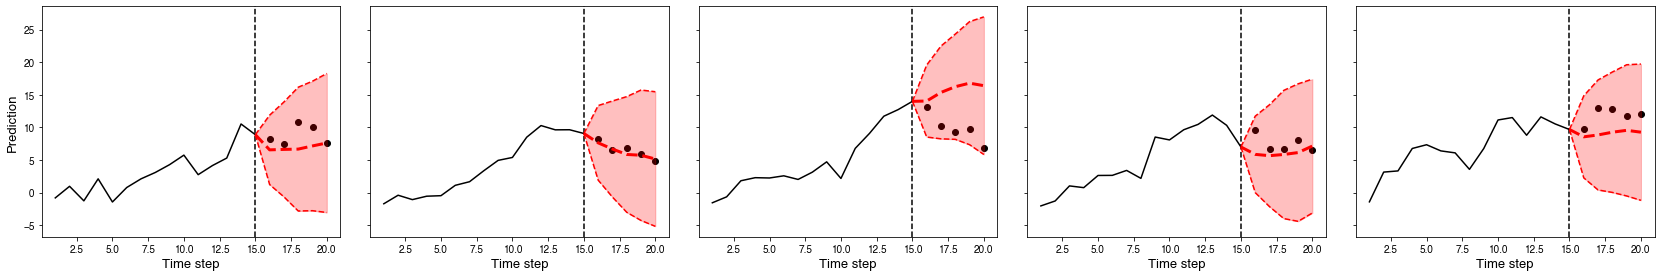

In [46]:
plot_timeseries(experiment='static', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_static')

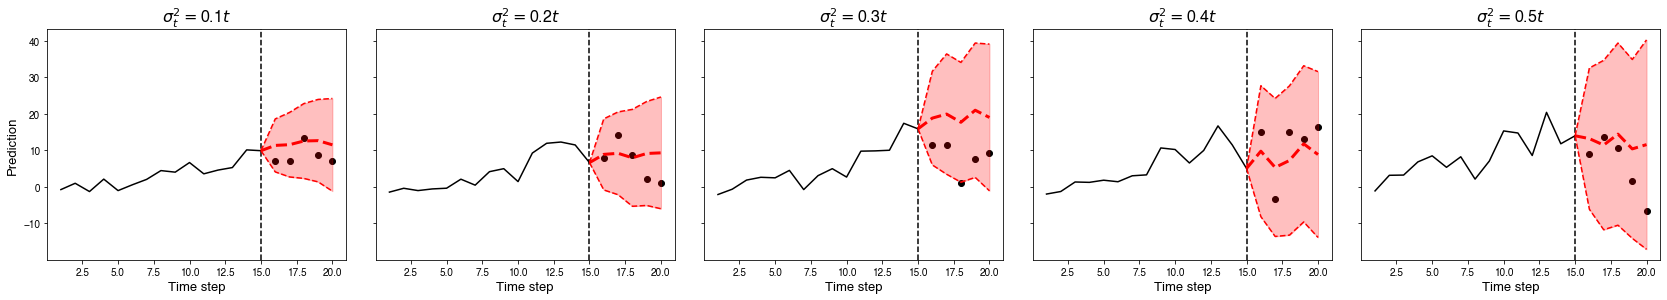

In [47]:
plot_timeseries(experiment='time_dependent', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_time_dependent')